In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
dataset = pd.read_csv('kc_house_data.csv')
dataset = dataset.drop('id' , axis = 1)
dataset

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      20141013T000000   221900.0         3       1.00         1180      5650   
1      20141209T000000   538000.0         3       2.25         2570      7242   
2      20150225T000000   180000.0         2       1.00          770     10000   
3      20141209T000000   604000.0         4       3.00         1960      5000   
4      20150218T000000   510000.0         3       2.00         1680      8080   
5      20140512T000000  1225000.0         4       4.50         5420    101930   
6      20140627T000000   257500.0         3       2.25         1715      6819   
7      20150115T000000   291850.0         3       1.50         1060      9711   
8      20150415T000000   229500.0         3       1.00         1780      7470   
9      20150312T000000   323000.0         3       2.50         1890      6560   
10     20150403T000000   662500.0         3       2.50         3560      9796   
11     20140527T000000   468000.0         2       1.00         1160      6000   
12     20140528T000000   310000.0         3       1.00         1430     19901   
13     20141007T000000   400000.0         3       1.75         1370      9680   
14     20150312T000000   530000.0         5       2.00         1810      4850   
15     20150124T000000   650000.0         4       3.00         2950      5000   
16     20140731T000000   395000.0         3       2.00         1890     14040   
17     20140529T000000   485000.0         4       1.00         1600      4300   
18     20141205T000000   189000.0         2       1.00         1200      9850   
19     20150424T000000   230000.0         3       1.00         1250      9774   
20     20140514T000000   385000.0         4       1.75         1620      4980   
21     20140826T000000  2000000.0         3       2.75         3050     44867   
22     20140703T000000   285000.0         5       2.50         2270      6300   
23     20140516T000000   252700.0         2       1.50         1070      9643   
24     20141120T000000   329000.0         3       2.25         2450      6500   
25     20141103T000000   233000.0         3       2.00         1710      4697   
26     20140626T000000   937000.0         3       1.75         2450      2691   
27     20141201T000000   667000.0         3       1.00         1400      1581   
28     20140624T000000   438000.0         3       1.75         1520      6380   
29     20150302T000000   719000.0         4       2.50         2570      7173   
...                ...        ...       ...        ...          ...       ...   
21583  20140610T000000   399950.0         2       1.00          710      1157   
21584  20141202T000000   380000.0         3       2.50         1260       900   
21585  20140828T000000   270000.0         3       2.50         1870      5000   
21586  20141015T000000   505000.0         2       2.50         1430      1201   
21587  20150305T000000   385000.0         3       2.50         1520      1488   
21588  20141113T000000   414500.0         2       1.50         1210      1278   
21589  20140910T000000   347500.0         3       2.50         2540      4760   
21590  20140514T000000  1222500.0         4       3.50         4910      9444   
21591  20141002T000000   572000.0         4       2.75         2770      3852   
21592  20150416T000000   475000.0         3       2.25         1190      1200   
21593  20150317T000000  1088000.0         5       3.75         4170      8142   
21594  20141017T000000   350000.0         4       2.75         2500      5995   
21595  20141031T000000   520000.0         2       2.25         1530       981   
21596  20140813T000000   679950.0         5       2.75         3600      9437   
21597  20150421T000000  1575000.0         4       3.25         3410     10125   
21598  20141013T000000   541800.0         4       2.50         3118      7866   
21599  20140915T000000   810000.0         4       3.00         3990      7838   
21600  20141015T000000  1537000.0         5      

In [133]:
# first split your dependant and independant variables
training_data = dataset.iloc[:, [2,3,4,6,10,13]].values
goal_data = dataset.iloc[:, 1].values

# now scale the values
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# label_encoder = LabelEncoder()
# hot_encoder = OneHotEncoder(categorical_features=[3])
# training_data[:,-1] = label_encoder.fit_transform(training_data[:,-1])
# training_data = hot_encoder.fit_transform(training_data).toarray()

In [134]:
def getPolynomial(data, degree=1):
    if degree ==1:
        return data
    poly = PolynomialFeatures(degree= degree)
    poly_features = poly.fit_transform(data)
    return poly_features

In [135]:
# split train and test sets
from sklearn.cross_validation import train_test_split
train_set, test_set, goal_train, goal_test = train_test_split(training_data, goal_data, test_size=0.2, random_state = 0)

In [136]:
model = LinearRegression()
model.fit(getPolynomial(train_set , 4),goal_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [137]:
goal_predict = model.predict(getPolynomial(test_set,4))

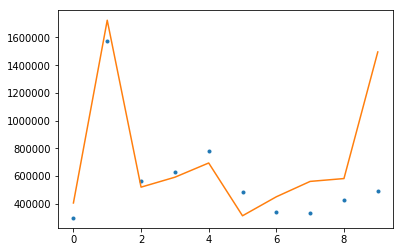

In [138]:
plt.plot(goal_test[:10], '.', goal_predict[:10], '-')
plt.show()

In [139]:
model.score(getPolynomial(train_set,4) , goal_train)

0.7039817931809802